In [1]:
# Import all neccesary modules for cleaning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings

In [2]:
warnings.filterwarnings("ignore") # Low memory - diff types warning
df_p2p = pd.read_csv("data/merged_df.csv")
df_p2p.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Change verbose to true for more information
df_p2p.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507520 entries, 0 to 2507519
Columns: 145 entries, Unnamed: 0 to settlement_term
dtypes: float64(107), int64(1), object(37)
memory usage: 2.7+ GB


In [4]:
df_p2p.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Column description
df_p2p.describe(include='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,2.507520e+06,0.0,0.0,2.507482e+06,2.507482e+06,2.507482e+06,2507482,2507482,2.507482e+06,2507482,...,9462.000000,12030.000000,12030.000000,2507482,39637,39637,39637,39637.000000,39637.000000,39637.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,688,NaN,7,...,NaN,NaN,NaN,2,87,3,94,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,11.99%,NaN,B,...,NaN,NaN,NaN,N,Apr-19,COMPLETE,Jan-19,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1776617,53866,NaN,734128,...,NaN,NaN,NaN,2467845,2636,18297,1682,NaN,NaN,NaN
mean,9.171914e+04,NaN,NaN,1.520204e+04,1.519729e+04,1.518055e+04,NaN,NaN,4.490856e+02,NaN,...,455.991636,11675.541796,194.832664,NaN,NaN,NaN,NaN,4997.218972,47.734278,13.605772
std,8.452736e+04,NaN,NaN,9.327663e+03,9.326115e+03,9.330089e+03,NaN,NaN,2.698357e+02,NaN,...,375.791630,7671.264512,197.724432,NaN,NaN,NaN,NaN,3700.526051,7.131982,8.076993
min,0.000000e+00,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,NaN,NaN,4.930000e+00,NaN,...,1.920000,55.730000,0.010000,NaN,NaN,NaN,NaN,44.210000,0.200000,0.000000
25%,3.482600e+04,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,NaN,NaN,2.529700e+02,NaN,...,175.162500,5615.142500,46.250000,NaN,NaN,NaN,NaN,2199.000000,45.000000,7.000000
50%,7.124800e+04,NaN,NaN,1.300000e+04,1.300000e+04,1.300000e+04,NaN,NaN,3.804100e+02,NaN,...,354.375000,10042.250000,133.595000,NaN,NaN,NaN,NaN,4128.000000,45.000000,15.000000
75%,1.115880e+05,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,NaN,NaN,5.983000e+02,NaN,...,625.365000,16265.237500,285.537500,NaN,NaN,NaN,NaN,6823.000000,50.000000,18.000000


In [6]:
# List of all the columns that will be dropped
dropped_cols = [
    'Unnamed: 0',       # IDs not needed for data analysis
    'id',               # IDs not needed for data analysis
    'member_id',        # IDs not needed for data analysis
    'application_type', # All values homogeneous
    'funded_amnt',      # Values will always be same as loan_amnt
    'url',              # Only available to investors
    
    # These information below are not available before accepting the borrower, so very useless for training or drawing insights
    'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_percentage', 'settlement_term',
    'debt_settlement_flag', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'hardship_loan_status',
    'hardship_dpd', 'hardship_length', 'hardship_start_date', 'hardship_end_date', 'hardship_amount', 'deferral_term',
    'hardship_status', 'hardship_reason', 'hardship_type', 'policy_code', 'recoveries', 'out_prncp_inv', 'out_prncp',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collection_recovery_fee', 'settlement_amount',
    'payment_plan_start_date', 'funded_amnt_inv', 'initial_list_status', 'hardship_flag', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collections_12_mths_ex_med'
]

In [7]:
# Drop all the listed columns
df_p2p.drop(axis=1, columns=dropped_cols, inplace=True)

In [8]:
# Drop rows which have all NaN values
df_p2p.dropna(how='all', inplace=True)

In [9]:
df_p2p.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,orig_projected_additional_accrued_interest
count,2.507482e+06,2.507482e+06,2.507478e+06,2.505202e+06,2.507453e+06,2.507452e+06,1.209417e+06,386632.000000,2.507453e+06,2.507453e+06,...,143978.000000,143978.000000,143978.000000,141585.000000,143978.000000,143978.000000,143978.000000,143978.000000,46792.000000,9462.000000
mean,1.520204e+04,4.490856e+02,7.868570e+04,1.899871e+01,2.996503e-01,5.625619e-01,3.472086e+01,73.401208,1.163160e+01,1.891760e-01,...,0.615413,1.560523,11.501625,57.436267,3.026650,12.526226,0.041854,0.071921,37.375577,455.991636
std,9.327663e+03,2.698357e+02,1.120892e+05,1.486775e+01,8.577625e-01,8.726257e-01,2.190412e+01,26.464630,5.679582e+00,5.515915e-01,...,0.974525,1.770482,6.632859,25.678815,3.257827,8.152104,0.381601,0.386614,23.862974,375.791630
min,5.000000e+02,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.920000
25%,8.000000e+03,2.529700e+02,4.638400e+04,1.194000e+01,0.000000e+00,0.000000e+00,1.600000e+01,56.000000,8.000000e+00,0.000000e+00,...,0.000000,0.000000,7.000000,38.800000,1.000000,7.000000,0.000000,0.000000,17.000000,175.162500
50%,1.300000e+04,3.804100e+02,6.500000e+04,1.791000e+01,0.000000e+00,0.000000e+00,3.200000e+01,75.000000,1.100000e+01,0.000000e+00,...,0.000000,1.000000,10.000000,59.400000,2.000000,11.000000,0.000000,0.000000,36.000000,354.375000
75%,2.000000e+04,5.983000e+02,9.500000e+04,2.463000e+01,0.000000e+00,1.000000e+00,5.000000e+01,94.000000,1.400000e+01,0.000000e+00,...,1.000000,3.000000,15.000000,78.000000,4.000000,17.000000,0.000000,0.000000,57.000000,625.365000
max,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,3.300000e+01,2.260000e+02,129.000000,1.010000e+02,8.600000e+01,...,6.000000,27.000000,82.000000,434.300000,43.000000,110.000000,21.000000,23.000000,185.000000,2680.890000


In [10]:
# Convert columns to date times
df_p2p.issue_d = pd.to_datetime(
    df_p2p.issue_d, format='%b-%y')
df_p2p.earliest_cr_line = pd.to_datetime(
    df_p2p.earliest_cr_line, format='%b-%y')
df_p2p.sec_app_earliest_cr_line = pd.to_datetime( 
    df_p2p.sec_app_earliest_cr_line, format='%b-%y')

In [11]:
# Add credit length and secondary app credit length
df_p2p['credit_length_years'] = df_p2p.issue_d - df_p2p.earliest_cr_line
df_p2p['credit_length_years'].fillna(0, inplace=True)
df_p2p['credit_length_years'] = (df_p2p['credit_length_years'].dt.days/365).astype(int)
df_p2p['secondary_app_credit_length_years'] = df_p2p.issue_d - df_p2p.sec_app_earliest_cr_line
df_p2p['secondary_app_credit_length_years'].fillna(0, inplace=True)
df_p2p['secondary_app_credit_length_years'] = (df_p2p['secondary_app_credit_length_years'].dt.days/365).astype(int)

In [12]:
# Delete the date time columns, they are not needed now
df_p2p.drop(axis=1, columns=['issue_d','earliest_cr_line','sec_app_earliest_cr_line'], inplace=True)

In [13]:
# Convert interest rate from string to percentage
df_p2p['int_rate'] = (df_p2p['int_rate'].str.strip('%')).astype(float)

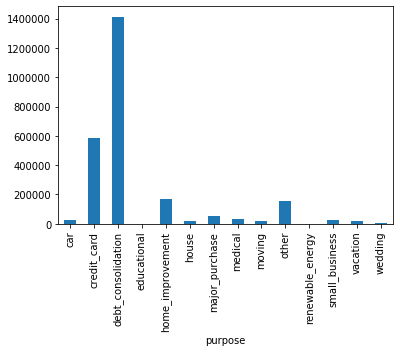

In [14]:
# Check what reasons people are taking loans out for
_ = df_p2p.groupby('purpose').size().plot.bar()
plt.show()

This means one of two things, either the borrowers are mostly requesting loans for credit card debt and refinancing or that the lending platform accepts more people with these reasons and rejects people of other reasons.

In [15]:
# Remove the rows with 'Current' loan status, since we do not know if they completed 
# their loans it is not useful to look at their data

not_ongoing_status = ((df_p2p['loan_status'] != 'Current') & (df_p2p['loan_status'] != 'In Grace Period'))
df_p2p = df_p2p[not_ongoing_status]

In [16]:
# Convert late paid loans into Fully Paid loans
# There is very little Late paid ones and they are technically fully paid
# Additionally, I changed loans that were charged off to 0 and fully paid ones to 1

df_p2p['loan_status'] = np.where(df_p2p['loan_status'] == 'Charged Off', 0,1)

In [17]:
# Check the loan status of each grade
df_p2p_grade_loan_count = df_p2p.groupby(['grade','loan_status'])['loan_status'].count()
df_p2p_gl_perc = df_p2p_grade_loan_count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_p2p_gl_perc

grade  loan_status
A      0               5.835521
       1              94.164479
B      0              12.997683
       1              87.002317
C      0              21.487177
       1              78.512823
D      0              28.692731
       1              71.307269
E      0              36.635774
       1              63.364226
F      0              43.476133
       1              56.523867
G      0              47.292490
       1              52.707510
Name: loan_status, dtype: float64

Above shows the grade breakdown, the riskiest loans in G have about a 44-50% chance of being charged off, while the safest grade A, has less than a 6% chance of being charged off. 

In [18]:
df_p2p.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,orig_projected_additional_accrued_interest,credit_length_years,secondary_app_credit_length_years
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,0
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0


In [19]:
# Even more conversion, convert emp_length into numeric
regex_pattern = r'[^0-9]'
df_p2p['emp_length'] = df_p2p['emp_length'].str.replace(regex_pattern, '')

In [20]:
# Print percentage of NaNs for each column
def percentage_na(col):
    '''Takes in a column and returns percentage of items in the column that are NaN'''
    num_null = col.isna().sum()
    num_tot = len(col)
    return (num_null/num_tot)*100

In [21]:
# Drop all columns with all NaNs
df_p2p.dropna(axis=1, how='all', inplace=True)

In [22]:
# Description might be useful but it has too many NaNs
# I think a description flag column would be better
df_p2p['has_desc'] = np.where(df_p2p['desc'].isna(), 0, 1)

# Drop the columns that have mostly NaNs
df_p2p.drop(axis=1, columns=['orig_projected_additional_accrued_interest', 'desc'], inplace=True)

In [23]:
df_p2p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526721 entries, 0 to 2507517
Data columns (total 99 columns):
loan_amnt                              1526721 non-null float64
term                                   1526721 non-null object
int_rate                               1526721 non-null float64
installment                            1526721 non-null float64
grade                                  1526721 non-null object
sub_grade                              1526721 non-null object
emp_title                              1424812 non-null object
emp_length                             1434235 non-null object
home_ownership                         1526721 non-null object
annual_inc                             1526717 non-null float64
verification_status                    1526721 non-null object
loan_status                            1526721 non-null int32
pymnt_plan                             1526721 non-null object
purpose                                1526721 non-null object
ti

In [24]:
# # Check the loan status of each grade
# x = df_p2p.groupby(['sub_grade','loan_status'])['loan_status'].count()
# y = x.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# y
# pd.set_option('display.max_columns', 100)
# df_p2p.head()

In [25]:
# More conversion
df_p2p['term'] = df_p2p['term'].str.strip('months').astype(int)/12

In [26]:
df_p2p.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,credit_length_years,secondary_app_credit_length_years,has_desc
0,5000.0,3.0,10.65,162.87,B,B2,NaN,10,RENT,24000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,0,1
1,2500.0,5.0,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0,1
2,2400.0,3.0,15.96,84.33,C,C5,NaN,10,RENT,12252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0,0


In [27]:
import random
import string

def generate_hex_color():
    '''
    Desc: Generate a random hexidecimal color 
    Param: N/A
    Return: A 6 digit randomized hexidecimal in format '#------'
    Return Type: String
    '''
    
    hex_color = '#'
    for i in np.arange(0,6):
        hex_color += random.choice(string.hexdigits)
    return hex_color

In [28]:
def ecdf(data):
    """
    Desc: Compute ECDF for a one-dimensional array of measurements.
    Param: data : Series of numerical data
    Return: x and y coordinates for cumulative distribution function
    Return Type: Tuple
    """
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [29]:
# TODO: change so that it displays multiple plots for ecdf

def plot_ecdf(datas, name=' ', width=15, height=10):
    '''
    Desc: Calculate and plot the ecdf of a given dataset
    Params: datas  : Tuple of Split DataFrame along with the selected label for the dataset
            name   : String name of the dependant variable
            width  : Int width of the figure
            height : Int height of the figure
            
    Return: None
    Return Type: N/A
    '''
    plt.figure(figsize=(width,height))
    
    for index, data in enumerate(datas):   
        # Generate a random six digit hex character
        color = generate_hex_color()

        x, y = ecdf(data[0])
        plt.plot(x, y, marker='.', linestyle='none', color=color, label=data[1][0])
        lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0), shadow=True, prop={'size': 16})
        
        # Increase the sizes of the markers inside the legend
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(25)

    # Label the axes
    _ = plt.xlabel(name)
    _ = plt.ylabel('ECDF')
    _ = plt.title('ECDF of {}'.format(name))

    # Display the plot
    plt.show()

In [30]:
# Split dataframe data by grade into a dictionary
grades = ['A','B','C','D','E','F','G']
dict_grade_split = dict()
for grade in grades:
    dict_grade_split[grade] = df_p2p[df_p2p['grade'] == grade]

In [31]:
# Split datafrae data by whether they were charged off or not charged off
# TO DO:

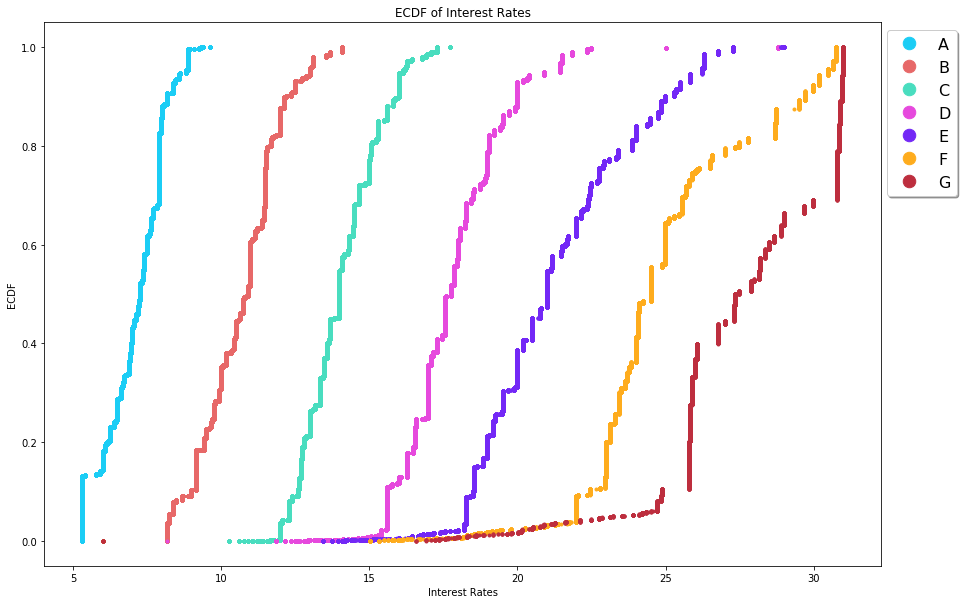

In [32]:
# ECDF for interest rates for each grade
plot_ecdf([(dict_grade_split[grade]['int_rate'], grade) for grade in grades], name='Interest Rates')

This is pretty obvious, if a person is risky you can charge them more. This is exactly like how we expect it to be

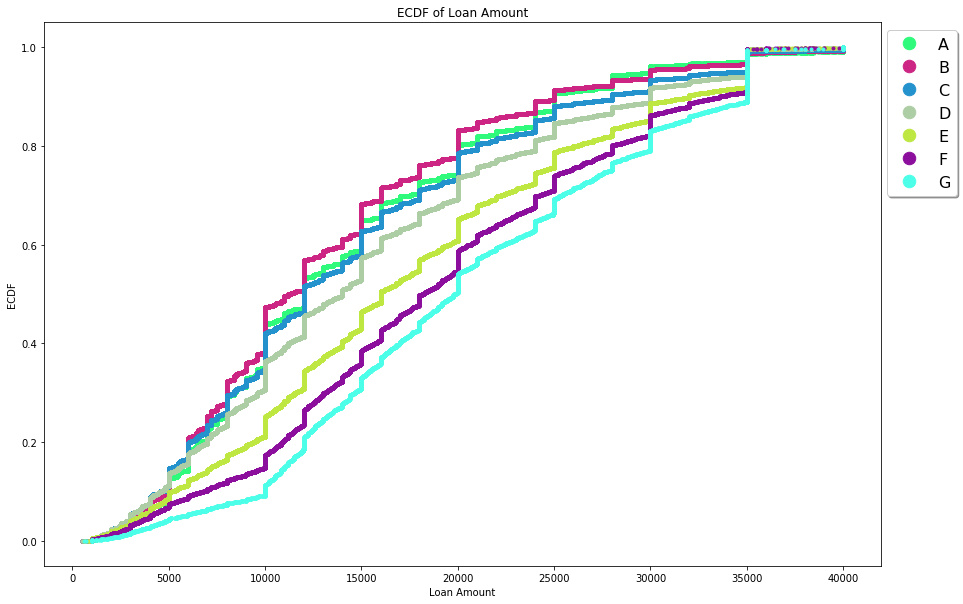

In [33]:
# ECDF for interest rates for each Loan Amount
plot_ecdf([(dict_grade_split[grade]['loan_amnt'], grade) for grade in grades], name='Loan Amount')

Those with lower grades happen to have less loan amounts. This could be several reasons, one could be that lending club does not accept those that are risky and loan a lot. 

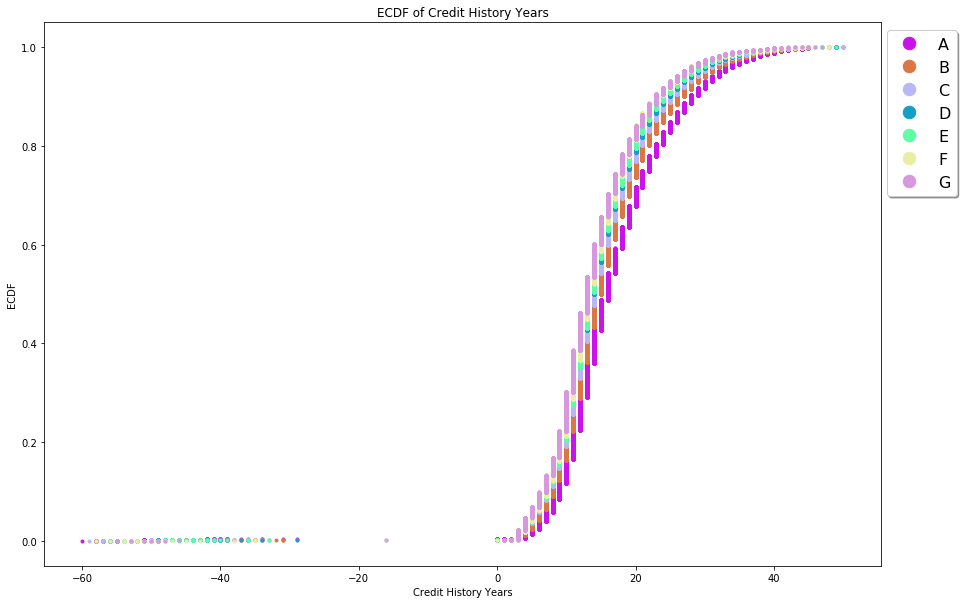

In [34]:
# ECDF for interest rates for Credit history
plot_ecdf([(dict_grade_split[grade]['credit_length_years'], grade) for grade in grades], name='Credit History Years')

Most of this is overlapping which means credit history does not really contribute to the current riskiness factor model

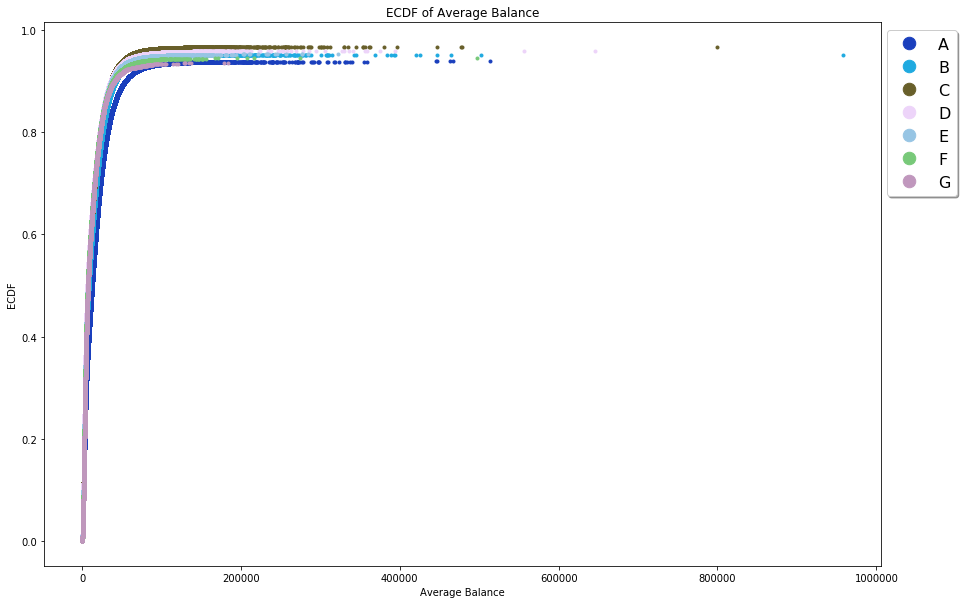

In [35]:
# ECDF for interest rates for average balance
plot_ecdf([(dict_grade_split[grade]['avg_cur_bal'], grade) for grade in grades], name='Average Balance')


In [36]:
# List of column name and the value we want to fill each NaN with
# 'MAX' means we want to fill it with the max() value of the column
to_fill_na = [("emp_title", "Unknown"),                  # Employment title
              ("emp_length", 0),                         # Employment length
              ("mths_since_last_delinq", "MAX"),         # Months since last deliquency
              ("mths_since_last_record", 0),             # The number of months since the last public record.
              ("mths_since_last_major_derog","MAX"),     # Months since most recent 90-day or worse rating 
              ("revol_util", 0),                         # Revolving credit utilization
              ("avg_cur_bal", 0),                        # Average balance
              ("bc_open_to_buy", 0),                     # Total open to buy on bank cards
              ("bc_util", 0),                            # Bank card utilization
              ("mo_sin_old_il_acct", 0),                 # Months since oldest bank installment account opened
              ("mths_since_recent_bc", 0),               # Months since most recent bank card account open
              ("mths_since_recent_bc_dlq", "MAX"),       # Months since most recent bank card deliquency
              ("mths_since_recent_inq", 0),              # Months since most recent inquiry.
              ("mths_since_recent_revol_delinq", "MAX"), # Months since most recent revolving credit deliquency
              ("num_tl_120dpd_2m", 0),                   # Number of accounts ever 120 or more days past due
              ("percent_bc_gt_75", 0)]                   # Percentage of all bankcard accounts > 75% of limit.

# Fill in all NaN values with respective values
for col_name, value in to_fill_na:
    # replace value if MAX keyword is used with max of the column
    if value == 'MAX':
        value = df_p2p[col_name].max()
    df_p2p[col_name].fillna(value, inplace=True)

In [37]:
for col in df_p2p.columns:
    perc = percentage_na(df_p2p[col])
    if perc > 0:
        print("Column: {} has {}% values NaN".format(col, percentage_na(df_p2p[col])))
        if perc > 50:
            # If percentage of values is greater than the threshold, drop the column
            df_p2p.drop(col, axis=1, inplace=True)

Column: annual_inc has 0.00026199940919133225% values NaN
Column: title has 1.2924430855408422% values NaN
Column: zip_code has 6.549985229783306e-05% values NaN
Column: dti has 0.039758410344784674% values NaN
Column: delinq_2yrs has 0.0018994957166371589% values NaN
Column: inq_last_6mths has 0.001964995568934992% values NaN
Column: open_acc has 0.0018994957166371589% values NaN
Column: pub_rec has 0.0018994957166371589% values NaN
Column: total_acc has 0.0018994957166371589% values NaN
Column: annual_inc_joint has 97.33893750069593% values NaN
Column: dti_joint has 97.33913400025283% values NaN
Column: verification_status_joint has 97.38871738844229% values NaN
Column: acc_now_delinq has 0.0018994957166371589% values NaN
Column: tot_coll_amt has 4.603067620082517% values NaN
Column: tot_cur_bal has 4.603067620082517% values NaN
Column: open_acc_6m has 53.93434687804779% values NaN
Column: open_act_il has 53.93428137819549% values NaN
Column: open_il_12m has 53.93428137819549% values

In [38]:
len(df_p2p.columns)

72

In [39]:
df_p2p.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,credit_length_years,secondary_app_credit_length_years,has_desc
0,5000.0,3.0,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,26,0,1
1,2500.0,5.0,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,0,1
2,2400.0,3.0,15.96,84.33,C,C5,Unknown,10,RENT,12252.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,10,0,0
3,10000.0,3.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,15,0,1
4,3000.0,5.0,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,15,0,1


In [40]:
df_p2p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526721 entries, 0 to 2507517
Data columns (total 72 columns):
loan_amnt                            1526721 non-null float64
term                                 1526721 non-null float64
int_rate                             1526721 non-null float64
installment                          1526721 non-null float64
grade                                1526721 non-null object
sub_grade                            1526721 non-null object
emp_title                            1526721 non-null object
emp_length                           1526721 non-null object
home_ownership                       1526721 non-null object
annual_inc                           1526717 non-null float64
verification_status                  1526721 non-null object
loan_status                          1526721 non-null int32
pymnt_plan                           1526721 non-null object
purpose                              1526721 non-null object
title                        

In [43]:
pd.set_option('display.max_columns', 100)
df_p2p.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,credit_length_years,secondary_app_credit_length_years,has_desc
0,5000.0,3.0,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,1,n,credit_card,Computer,860xx,AZ,27.65,0.0,1.0,226.0,0.0,3.0,0.0,13648.0,83.70%,9.0,226.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,202.0,0.0,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,26,0,1
1,2500.0,5.0,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,0,n,car,bike,309xx,GA,1.00,0.0,5.0,226.0,0.0,3.0,0.0,1687.0,9.40%,4.0,226.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,202.0,0.0,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,0,1
2,2400.0,3.0,15.96,84.33,C,C5,Unknown,10,RENT,12252.0,Not Verified,1,n,small_business,real estate business,606xx,IL,8.72,0.0,2.0,226.0,0.0,2.0,0.0,2956.0,98.50%,10.0,226.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,202.0,0.0,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,10,0,0


In [44]:
df = pd.read_csv("data/merged_df.csv")

In [46]:
df['open_act_il'].isna().sum()

866167

In [48]:
len(df_p2p)

1526721

In [41]:
'''
TODO:
turn revolving credit utilization into a percentage
emp_length into int
'''

'\nTODO:\nturn revolving credit utilization into a percentage\nemp_length into int\n'